In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mobility_df = pd.read_csv('차량 연비 데이터(2002~2022).csv')

In [ ]:
# 클래스 명 통일
mobility_df['VEHICLE CLASS'] = mobility_df['VEHICLE CLASS'].str.replace('-', '').str.upper().str.replace(':','').str.replace(' ','')

# 클래스 별 그룹화
mobility_df['CLASS GROUP'] = mobility_df['VEHICLE CLASS'].replace({
'SUBCOMPACT' : 'CAR',
'MINICOMPACT' : 'CAR',
'COMPACT' : 'CAR',
'MIDSIZE' : 'CAR',
'FULLSIZE' : 'CAR',
'TWOSEATER' : 'CAR',
'SUV' : 'SUV',
'SUV SMALL' : 'SUV',
'SUV STANDARD' : 'SUV',
'PICKUPTRUCK STANDARD' : 'TRUCK',
'PICKUPTRUCK SMALL' : 'TRUCK',
'VANCARGO' : 'VAN',
'VANPASSENGER' : 'VAN',
'MINIVAN' : 'VAN',
'STATIONWAGON SMALL' : 'WAGON',
'STATIONWAGON MIDSIZE' : 'WAGON',
'SPECIALPURPOSE VEHICLE' : 'SPECIAL'

# 제조사 명 대문자로 통일
mobility_df['MAKE'] = mobility_df['MAKE'].str.upper().str.replace('-','').str.replace(' ','')

# 연료 이름 변경
mobility_df['FUEL'] = mobility_df['FUEL'].replace({
'X' : 'Gasoline',
'Z' : 'Premium',
'D' : 'Diesel',
'E' : 'Ethanol',
'N' : 'Natural Gas'
})

# 엔진 사이즈 그룹화
mobility_df['ENGINE GROUP'] = mobility_df['ENGINE SIZE'].map(lambda x: '0~1' if x < 1
else('1~2' if x < 2
else('2~3' if x < 3
else('3~4' if x < 4
else('4~5' if x < 5
else('5~6' if x < 6
else('6~7' if x < 7
else'7~')))))))

# 엔진 사이즈 상위 하위 20% 그룹화
mobility_df['ENGINE SML'] = mobility_df['ENGINE SIZE'].map(lambda x: 'SMALL(bottom 20%)' if x <= 2
else ('MIDDLE' if x < 4.6
else 'LARGE(top 20%)'))

# 실린더 상위 하위 20% 그룹화
mobility_df['CYLINDERS GROUP'] = mobility_df['CYLINDERS'].map(lambda x: 'LOWER' if x <= 4
else ('MIDDLE' if x < 8
else 'UPPER'))


# 디젤게이트 구분: RED-연루 YELLOW-의혹 GREEN-청렴
mobility_df['DIESEL GATE'] = mobility_df['MAKE'].replace({
'CHEVROLET': 'GREEN',
'FORD' : 'GREEN',
'BMW' : 'RED',
'GMC' : 'GREEN',
'MERCEDESBENZ' : 'RED',
'TOYOTA' : 'YELLOW',
'PORSCHE' : 'RED',
'DODGE' : 'RED',
'AUDI' : 'RED',
'NISSAN' : 'YELLOW',
'VOLKSWAGEN' : 'RED ',
'MAZDA' : 'YELLOW',
'HYUNDAI' : 'YELLOW',
'HONDA' : 'YELLOW',
'JEEP' : 'RED',
'KIA' : 'YELLOW',
'SUBARU' : 'YELLOW',
'VOLVO' : 'GREEN',
'LEXUS' : 'YELLOW',
'CADILLAC' : 'GREEN',
'CHRYSLER' : 'RED',
'MINI' : 'GREEN',
'JAGUAR' : 'GREEN',
'MITSUBISHI' : 'YELLOW',
'INFINITI' : 'YELLOW',
'BUICK' : 'GREEN',
'PONTIAC' : 'GREEN',
'ACURA' : 'YELLOW',
'LINCOLN' : 'GREEN',
'SUZUKI' : 'YELLOW',
'SAAB' : 'GREEN',
'LANDROVER' : 'GREEN',
'SATURN' : 'GREEN',
'RAM' : 'RED',
'MASERATI' : 'RED',
'BENTLEY' : 'RED',
'LAMBORGHINI' : 'RED',
'ROLLSROYCE' : 'GREEN',
'ASTONMARTIN' : 'GREEN',
'FIAT' : 'RED',
'FERRARI' : 'GREEN',
'SCION' : 'GREEN',
'GENESIS' : 'GREEN',
'ALFAROMEO' : 'GREEN',
'OLDSMOBILE' : 'GREEN',
'DAEWOO' : 'GREEN',
'SMART' : 'GREEN',
'HUMMER' : 'GREEN',
'ISUZU' : 'GREEN',
'BUGATTI' : 'RED',
'SRT' : 'GREEN',
'PLYMOUTH' : 'GREEN'
})

# TRANSMISSION 컬럼 prefix(변속기 종류), gear(기어 수) 컬럼으로 분할
mobility_df["PREFIX"] = mobility_df["TRANSMISSION"].str.extract(r"([A-Z]+)")
mobility_df["GEAR"] = mobility_df["TRANSMISSION"].str.extract(r"(\d+)").astype(float)

# 차량 나이
mobility_df['CAR AGE'] = 2022 - mobility_df['YEAR']

# 열 순서 정리
mobility_df = mobility_df[['YEAR' , 'CAR AGE', 'MAKE', 'DIESEL GATE', 'CLASS GROUP', 'VEHICLE CLASS', 'ENGINE SML', 'ENGINE GROUP', 'ENGINE SIZE', 'CYLINDERS GROUP', 'CYLINDERS', 'TRANSMISSION', "PREFIX", "GEAR", 'FUEL', 'CITY (km/L)', 'HWY (km/L)', 'COMB (km/L)', 'COMB (mpg)', 'EMISSIONS']]

In [ ]:
palette_ip = {
    "Gasoline": "#4C72B0",
    "Premium": "#DD8452",
    "Ethanol": "#55A868",
    "Natural Gas": "#C44E52",
    "Diesel": "#8C8C8C",
    "SUV": "#8172B3",
    "TRUCK": "#DA8BC3",
    "WAGON": "#937860",
    "SPECIAL": "#E2A458",
    "CAR": "#64B5CD",
    "VAN": "#4E9A06"
}

# 예시 1
#### 연료 유형별 평균 연비, 배출량 비교
#### 노션에 나온 코드 그대로
#### 그런데 값을 비교하기에는 부적합한 그래프인 것 같아서 밑에 따로따로 비교함

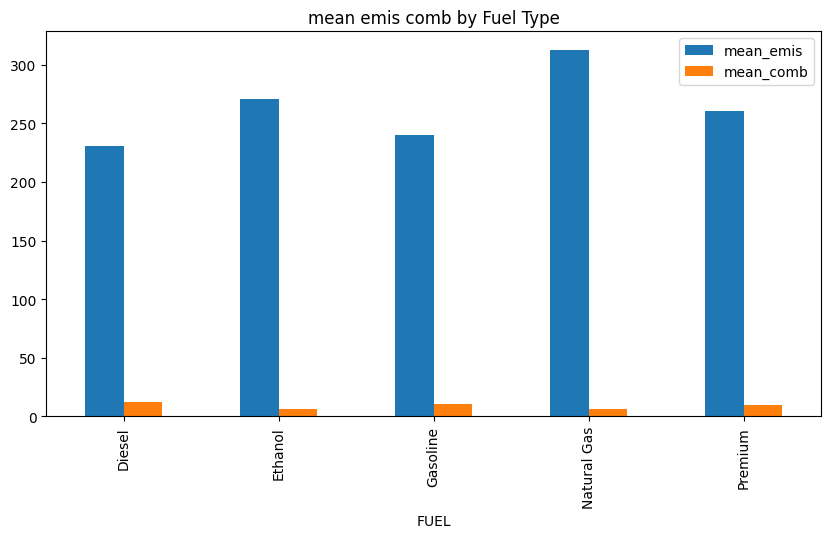

In [ ]:
fuel_summary = mobility_df.groupby("FUEL").agg(
    mean_emis=("EMISSIONS","mean"),
    mean_comb=("COMB (km/L)","mean"),
    n=("FUEL","count")
).reset_index()

# 시각화
fuel_summary.plot(x="FUEL", y=["mean_emis","mean_comb"], kind="bar", figsize=(10,5))
plt.title("mean emis comb by Fuel Type")
plt.show()

#### 연료별 평균 연비 막대 그래프

C:\Users\jiwoong\AppData\Local\Temp\ipykernel_27340\1093102404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = emission_comb_by_fuel['FUEL'], y = emission_comb_by_fuel['COMB (km/L)'], palette = palette_ip)


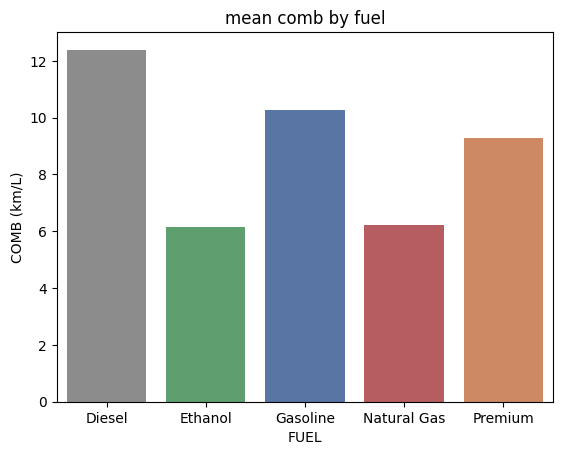

In [ ]:
emission_comb_by_fuel = mobility_df.groupby('FUEL').agg({'COMB (km/L)': 'mean', 'EMISSIONS' : 'mean'}).reset_index()
sns.barplot(x = emission_comb_by_fuel['FUEL'], y = emission_comb_by_fuel['COMB (km/L)'], palette = palette_ip)
plt.title('mean comb by fuel')
plt.show()

#### 연료별 평균 배출량 막대 그래프

C:\Users\jiwoong\AppData\Local\Temp\ipykernel_27340\1259883145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = emission_comb_by_fuel['FUEL'], y = emission_comb_by_fuel['EMISSIONS'], palette = palette_ip)


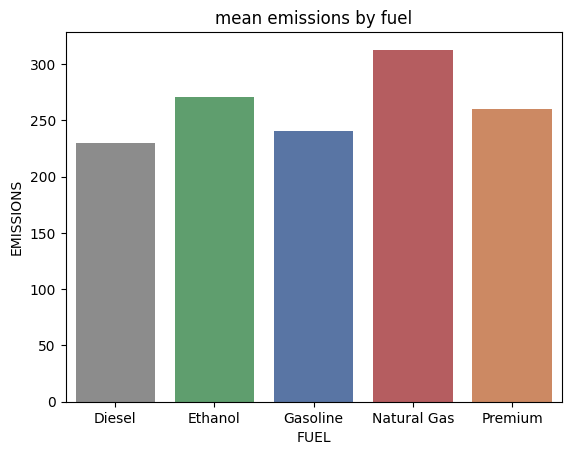

In [ ]:
sns.barplot(x = emission_comb_by_fuel['FUEL'], y = emission_comb_by_fuel['EMISSIONS'], palette = palette_ip)
plt.title('mean emissions by fuel')
plt.show()

#### 연료별 평균 연비, 배출량 표
#### 디젤이 가장 연비가 좋고 배출량이 낮음
#### 디젤 차가 가장 효율적인 친환경 차량

In [ ]:
print(emission_comb_by_fuel.round(2))

          FUEL  COMB (km/L)  EMISSIONS
0       Diesel        12.39     230.31
1      Ethanol         6.16     270.58
2     Gasoline        10.27     240.28
3  Natural Gas         6.22     312.85
4      Premium         9.30     260.57


In [ ]:
annual_emission_comb_by_fuel = mobility_df.groupby(['YEAR', 'FUEL']).agg({'COMB (km/L)': 'mean', 'EMISSIONS' : 'mean'}).reset_index()
annual_emission_comb_by_fuel

,YEAR,FUEL,COMB (km/L),EMISSIONS
0,2000,Diesel,18.140000,150.000000
1,2000,Ethanol,6.370000,251.000000
2,2000,Gasoline,9.372643,260.592511
3,2000,Natural Gas,6.020000,314.000000
4,2000,Premium,9.102386,260.914773
...,...,...,...,...
93,2021,Premium,8.791084,279.896163
94,2022,Diesel,9.927857,271.571429
95,2022,Ethanol,5.795000,294.857143
96,2022,Gasoline,10.627780,238.033632


# 예시 1 추가 자료
#### 연도별 연료별 배출량

Text(0.5, 1.0, 'Annual Emissions by FUEL')

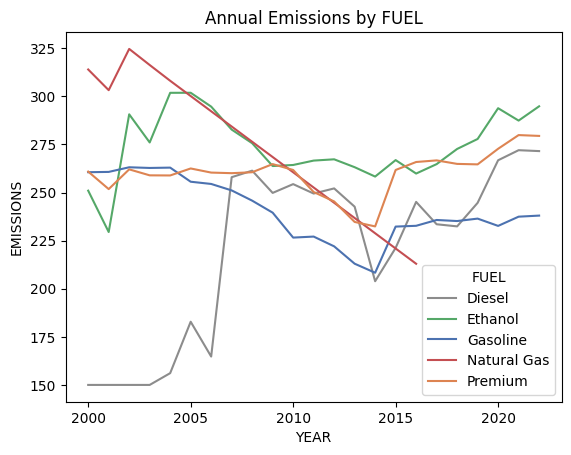

In [ ]:
sns.lineplot(x = annual_emission_comb_by_fuel['YEAR'], y = annual_emission_comb_by_fuel['EMISSIONS'], hue = annual_emission_comb_by_fuel['FUEL'], palette=palette_ip)
plt.title('Annual Emissions by FUEL')

#### 그런데 디젤의 평균이 낮은 이유가 과거에 과도하게 낮아서 그런 것 같다
#### 추세를 봤을 때는 천연가스나 가솔린이 더 가치가 있어보임


#### 연도별 연료별 연비

Text(0.5, 1.0, 'Annual COMB by FUEL')

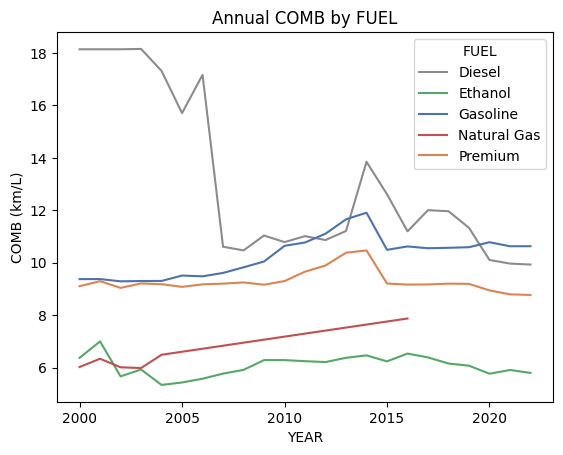

In [ ]:
sns.lineplot(x = annual_emission_comb_by_fuel['YEAR'], y = annual_emission_comb_by_fuel['COMB (km/L)'], hue = annual_emission_comb_by_fuel['FUEL'], palette=palette_ip)
plt.title('Annual COMB by FUEL')

# 예시 1 분석
#### 과거의 디젤 차량은 어떻게 연비는 매우 좋고, 배출량은 낮았을까?
#### 과거 성능의 디젤 차량을 만들 수 있는가?
#### 천연가스는 왜 16~17년 이후로는 생산되지 않는가?
#### 현재 기준으로는 디젤보다 연비가 좋고 배출량도 낮은 가솔린이 가장 효율적인 차량인듯 하다

# 예시 2

#### 엔진 크기 구간별 배출량 분포
#### 예시로 나온 구분보다 더 세분화함

ENGINE GROUP
0~1       6
1~2    2227
2~3    7139
3~4    6620
4~5    2700
5~6    2695
6~7    1120
7~       49
Name: count, dtype: int64
  ENGINE GROUP  EMISSIONS
0          0~1     134.17
1          1~2     173.11
2          2~3     212.28
3          3~4     251.58
4          4~5     301.30
5          5~6     316.43
6          6~7     346.25
7           7~     392.10


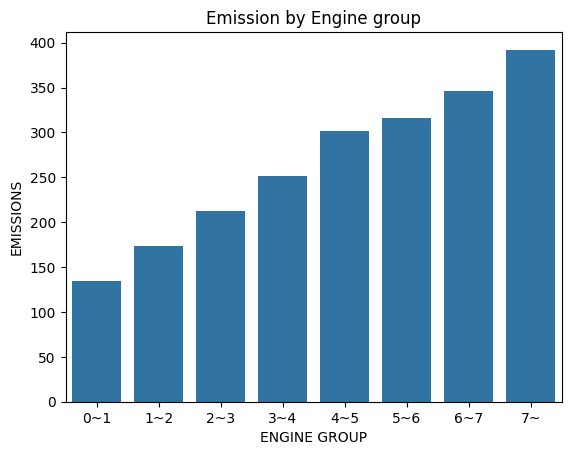

In [ ]:
# 엔진 크기를 구간화
engine_summary = mobility_df.groupby("ENGINE GROUP")["EMISSIONS"].mean().reset_index().round(2)
print(mobility_df['ENGINE GROUP'].value_counts().sort_index())
print(engine_summary)
sns.barplot(data=engine_summary, x="ENGINE GROUP", y="EMISSIONS")
plt.title("Emission by Engine group")
plt.show()

#### 엔진 수가 늘어날수록 배출량이 증가한다
#### 2~3,3~4 구간이 가장 많고
#### 자료를 보면 보통 구간별로 40정도 차이가 난다고 생각할 수 있다
#### 5~6구간 또한 2695라는 적지않은 표본을 가지고 있으면서
#### 다른 구간과의 차이에 비해 낮은 수치를 가진
#### 5~6구간이 가장 친환경적인 차량이 될 듯하다

# 예시 4

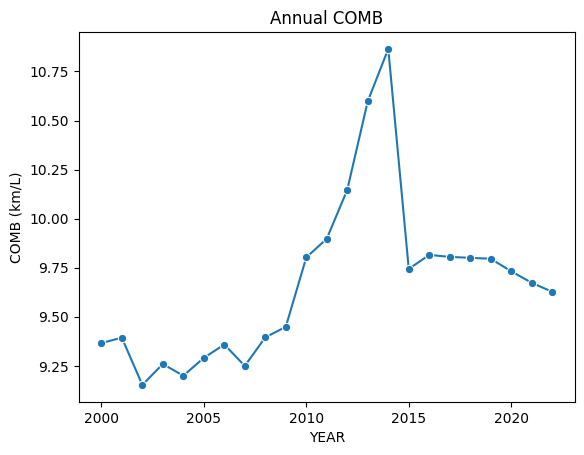

In [ ]:
year_summary = mobility_df.groupby("YEAR")["COMB (km/L)"].mean().reset_index()

sns.lineplot(data=year_summary, x="YEAR", y="COMB (km/L)", marker="o")
plt.title("Annual COMB")
plt.ylabel("COMB (km/L)")
plt.show()

#### 14년도까지 연비가 계속 상승하다가 15년부터 일정수준을 유지한다
#### 디젤 게이트와 관련이 있는 것일까?
#### 14년도까지 AV차량 생산이 많았던 것일까?
#### 이유가 무엇일까

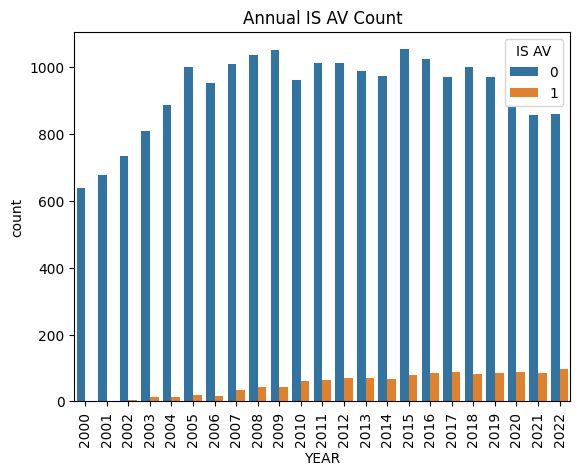

In [ ]:
mobility_df['IS AV'] = (mobility_df['PREFIX']=='AV').astype(int)
sns.countplot(data = mobility_df, x = 'YEAR', hue = 'IS AV')
plt.xticks(rotation = 90)
plt.title('Annual IS AV Count')
plt.show()

#### AV차량은 점점 늘어났다
#### 14년도까지만 특별하게 증가하고 그 뒤로 감소하지 않았는데
#### 15년도부터 연비가 감소하고 유지된 이유가 뭐지?

# 예시 5
#### 노션에 나와있는 그대로

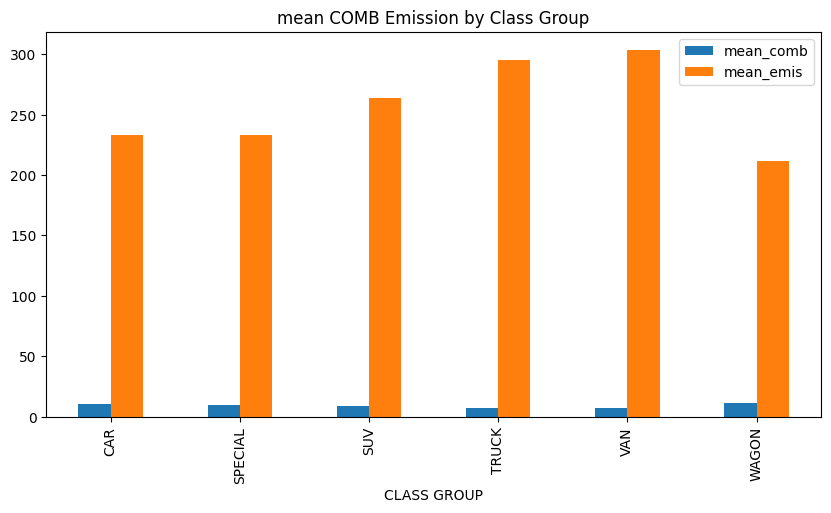

In [ ]:
class_summary = mobility_df.groupby("CLASS GROUP").agg(
    mean_comb=("COMB (km/L)","mean"),
    mean_emis=("EMISSIONS","mean")
).reset_index()

class_summary.plot(x="CLASS GROUP", y=["mean_comb","mean_emis"], kind="bar", figsize=(10,5))
plt.title("mean COMB Emission by Class Group")
plt.show()

#### 이 그래프 역시
#### 배출량 비교 하기에는 괜찮지만
#### 연비는 수치가 낮아서
#### 비교하기에는 불편함이 있다

In [ ]:
year_class_mean = mobility_df.groupby(['YEAR', 'CLASS GROUP']).agg({'EMISSIONS' : 'mean', 'COMB (km/L)' : 'mean'}).reset_index()
print(year_class_mean.round(2))

     YEAR CLASS GROUP  EMISSIONS  COMB (km/L)
0    2000         CAR     229.51        10.51
1    2000         SUV     294.84         8.10
2    2000       TRUCK     307.33         7.62
3    2000         VAN     308.08         7.50
4    2000       WAGON     222.97        10.48
..    ...         ...        ...          ...
123  2022     SPECIAL     237.50         9.42
124  2022         SUV     262.29         9.44
125  2022       TRUCK     303.56         7.86
126  2022         VAN     227.00        10.88
127  2022       WAGON     220.00        11.62

[128 rows x 4 columns]


#### 연도별 차종별 배출량

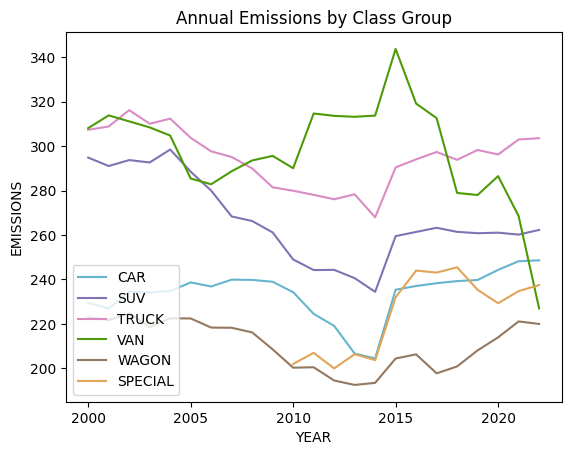

In [ ]:
sns.lineplot(x = year_class_mean['YEAR'], y = year_class_mean['EMISSIONS'], hue = year_class_mean['CLASS GROUP'], palette=palette_ip)
plt.title('Annual Emissions by Class Group')
plt.legend(loc = 'lower left')
plt.show()

#### 연도별 차종별 연비

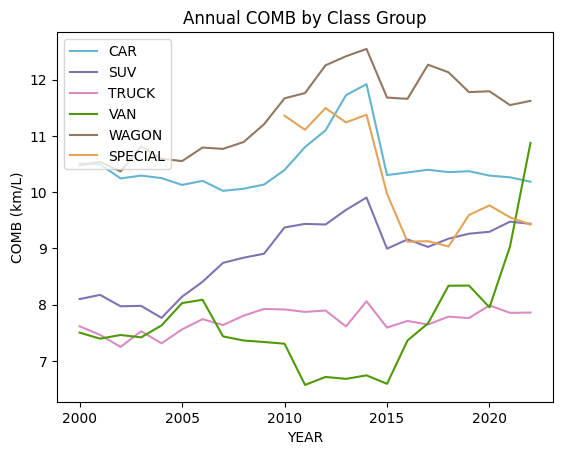

In [ ]:
sns.lineplot(x = year_class_mean['YEAR'], y = year_class_mean['COMB (km/L)'], hue = year_class_mean['CLASS GROUP'], palette=palette_ip)
plt.title('Annual COMB by Class Group')
plt.legend(loc = 'upper left')
plt.show()

#### 연도별 연비와 배출량을 봤을 때
#### 왜건이 가장 효율적인 차량임
#### 밴은 최근들어 어떻게 가파른 성장이 가능했는가?
#### 튀는 데이터가 아니라
#### 그 이유가 합당하다면 밴도 생산을 고려해 봄직하다


In [ ]:
mobility_df[mobility_df['CLASS GROUP'] == 'VAN']['YEAR'].value_counts()

YEAR
2007    73
2003    71
2012    69
2013    67
2000    66
2011    63
2002    63
2014    61
2008    60
2005    58
2001    58
2006    57
2009    54
2004    53
2010    40
2015    34
2016    19
2017    19
2018    13
2020    12
2019    11
2021    11
2022     7
Name: count, dtype: int64

#### 밴의 생산량이 급격히 줄었다
#### 튀는 데이터일 가능성이 있다
#### 최근에 생산된 밴의 종류가 minivan이라 연비가 좋아진 걸 수도 있다

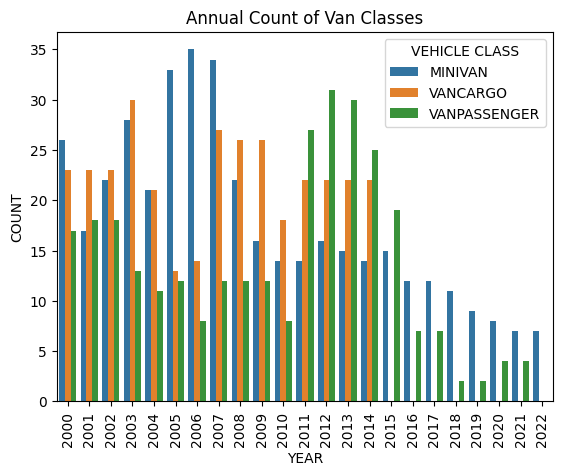

In [ ]:
test = mobility_df[(mobility_df['CLASS GROUP'] == 'VAN')].groupby(['YEAR', 'VEHICLE CLASS']).size().reset_index(name = 'COUNT')
sns.barplot(data = test, x = 'YEAR',y = 'COUNT', hue = 'VEHICLE CLASS')
plt.xticks(rotation = 90)
plt.title('Annual Count of Van Classes')
plt.show()

#### 15년도부터 vancargo가 생산되지 않았다
#### 그로 인해 15년도부터 급격하게 van의 연비가 좋아지고 배출량이 낮아진 듯 하다

In [ ]:
mobility_df[(mobility_df['CLASS GROUP'] == 'VAN')].groupby('VEHICLE CLASS')[['COMB (km/L)', 'EMISSIONS']].mean().reset_index()
print(mobility_df[(mobility_df['CLASS GROUP'] == 'VAN')].groupby('VEHICLE CLASS')[['COMB (km/L)', 'EMISSIONS']].mean().reset_index().round(2))

  VEHICLE CLASS  COMB (km/L)  EMISSIONS
0       MINIVAN         8.94     250.33
1      VANCARGO         6.59     324.47
2  VANPASSENGER         6.04     351.79


#### vancargo가 vanpassenger보다 연비도 좋고 배출량도 낮지만
#### minivan의 연비와 배출량이 확연히 좋기 때문에
#### 연도별 minivan의 비율이 증가하면서
#### van의 연비와 배출량이 좋아진 듯한 그래프가 나타난다
#### minivan을 생산하는 것도 좋은 선택지가 될 것 같다

#### 미니밴의 기어 수

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'MINIVAN']['GEAR'].value_counts()

GEAR
4.0     203
6.0      98
5.0      65
9.0      17
8.0      12
7.0       8
10.0      5
Name: count, dtype: int64

#### 미니밴의 연료

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'MINIVAN']['FUEL'].value_counts()

FUEL
Gasoline    353
Ethanol      52
Premium       3
Name: count, dtype: int64

#### 미니밴의 연도별 연비와 배출량

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'MINIVAN'].groupby('YEAR')[['COMB (km/L)', 'EMISSIONS']].mean()

,COMB (km/L),EMISSIONS
YEAR,,
2000,8.474615,266.076923
2001,8.784706,262.352941
2002,8.675455,262.181818
2003,8.676071,254.785714
2004,9.060000,255.047619
2005,8.742727,254.121212
2006,8.765429,253.857143
2007,8.553824,249.676471
2008,8.931364,244.454545


#### 왜건의 종류별 연비와 배출량

In [ ]:
mobility_df[mobility_df['CLASS GROUP'] == 'WAGON'].groupby(['YEAR', 'VEHICLE CLASS'])[['COMB (km/L)', 'EMISSIONS']].mean()

COMB (km/L)   EMISSIONS
YEAR VEHICLE CLASS                               
2000 STATIONWAGONMIDSIZE    10.067200  230.360000
     STATIONWAGONSMALL      11.260000  208.769231
2001 STATIONWAGONMIDSIZE    10.236774  227.322581
     STATIONWAGONSMALL      11.323333  207.333333
2002 STATIONWAGONMIDSIZE    10.348437  225.375000
     STATIONWAGONSMALL      10.404444  223.833333
2003 STATIONWAGONMIDSIZE    10.275714  227.142857
     STATIONWAGONSMALL      11.234000  211.955556
2004 STATIONWAGONMIDSIZE    10.080244  230.853659
     STATIONWAGONSMALL      11.086279  214.651163
2005 STATIONWAGONMIDSIZE    10.003421  231.315789
     STATIONWAGONSMALL      10.938148  216.240741
2006 STATIONWAGONMIDSIZE     9.913214  235.000000
     STATIONWAGONSMALL      11.258679  209.584906
2007 STATIONWAGONMIDSIZE    10.150625  229.593750
     STATIONWAGONSMALL      11.220455  210.045455
2008 STATIONWAGONMIDSIZE    10.137222  228.555556
     STATIONWAGONSMALL      11.206279  211.023256
2009 STATIONWAGONMIDSIZE    10.123846  229.000000
     STATIONWAGONSMALL      11.468148  203.648148
2010 STATIONWAGONMIDSIZE    10.245556  226.777778
     STATIONWAGONSMALL      11.882000  196.366667
2011 STATIONWAGONMIDSIZE    10.010000  230.750000
     STATIONWAGONSMALL      11.887500  198.357143
2012 STATIONWAGONMIDSIZE    12.392000  205.600000
     STATIONWAGONSMALL      12.241489  193.382979
2013 STATIONWAGONMIDSIZE    13.790000  196.333333
     STATIONWAGONSMALL      12.322727  192.318182
2014 STATIONWAGONMIDSIZE    12.551667  203.500000
     STATIONWAGONSMALL      12.546176  191.735294
2015 STATIONWAGONMIDSIZE    10.885000  222.500000
     STATIONWAGONSMALL      11.864286  200.342857
2016 STATIONWAGONMIDSIZE    10.971429  227.142857
     STATIONWAGONSMALL      11.789730  202.378378
2017 STATIONWAGONMIDSIZE    11.330000  213.750000
     STATIONWAGONSMALL      12.432889  194.933333
2018 STATIONWAGONMIDSIZE    10.706000  227.100000
     STATIONWAGONSMALL      12.497179  194.179487
2019 STATIONWAGONMIDSIZE     9.292222  259.222222
     STATIONWAGONSMALL      12.384324  195.675676
2020 STATIONWAGONMIDSIZE     8.498750  286.625000
     STATIONWAGONSMALL      12.848400  190.720000
2021 STATIONWAGONMIDSIZE     8.488889  287.444444
     STATIONWAGONSMALL      12.925000  191.300000
2022 STATIONWAGONMIDSIZE     8.587500  285.375000
     STATIONWAGONSMALL      12.901579  192.473684

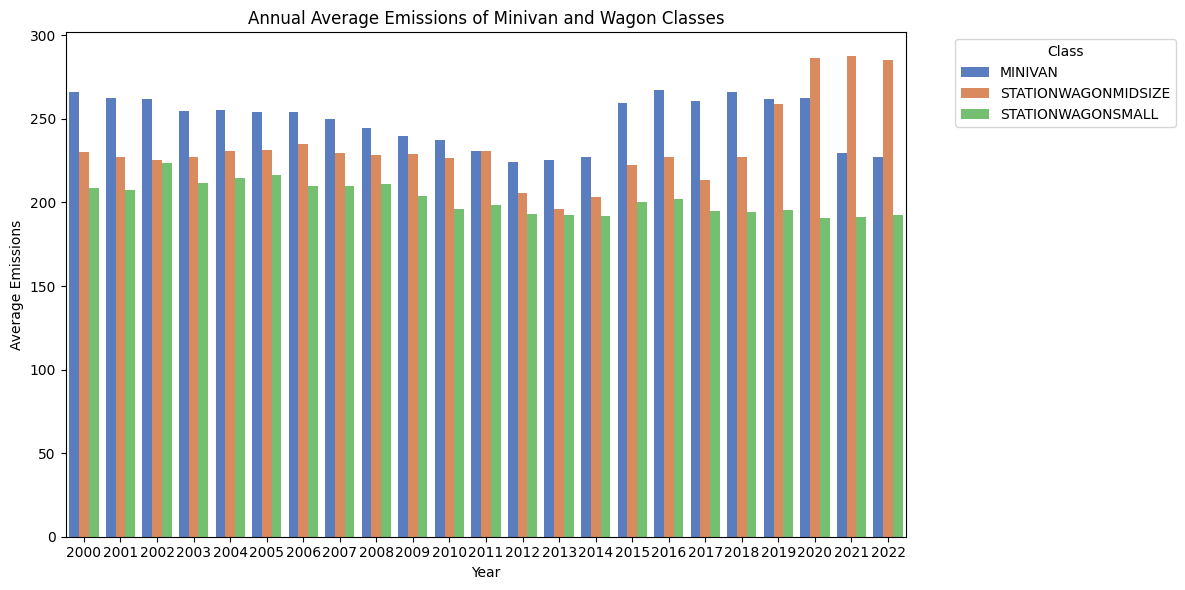

In [ ]:
df_minivan = (
    mobility_df[mobility_df['VEHICLE CLASS'] == 'MINIVAN']
    .groupby('YEAR')[['COMB (km/L)', 'EMISSIONS']]
    .mean()
    .reset_index()
)
df_minivan['CLASS'] = 'MINIVAN'

# WAGON 그룹 데이터
df_wagon = (
    mobility_df[mobility_df['CLASS GROUP'] == 'WAGON']
    .groupby(['YEAR', 'VEHICLE CLASS'])[['COMB (km/L)', 'EMISSIONS']]
    .mean()
    .reset_index()
)
df_wagon = df_wagon.rename(columns={'VEHICLE CLASS':'CLASS'})

# 두 자료 합치기
df_combined = pd.concat([df_minivan, df_wagon], ignore_index=True)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_combined,
    x="YEAR",
    y="EMISSIONS",
    hue="CLASS",         # MINIVAN + 각 WAGON 종류 색상 구분
    palette="muted"
)

plt.title("Annual Average Emissions of Minivan and Wagon Classes")
plt.ylabel("Average Emissions")
plt.xlabel("Year")
plt.legend(title="Class", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

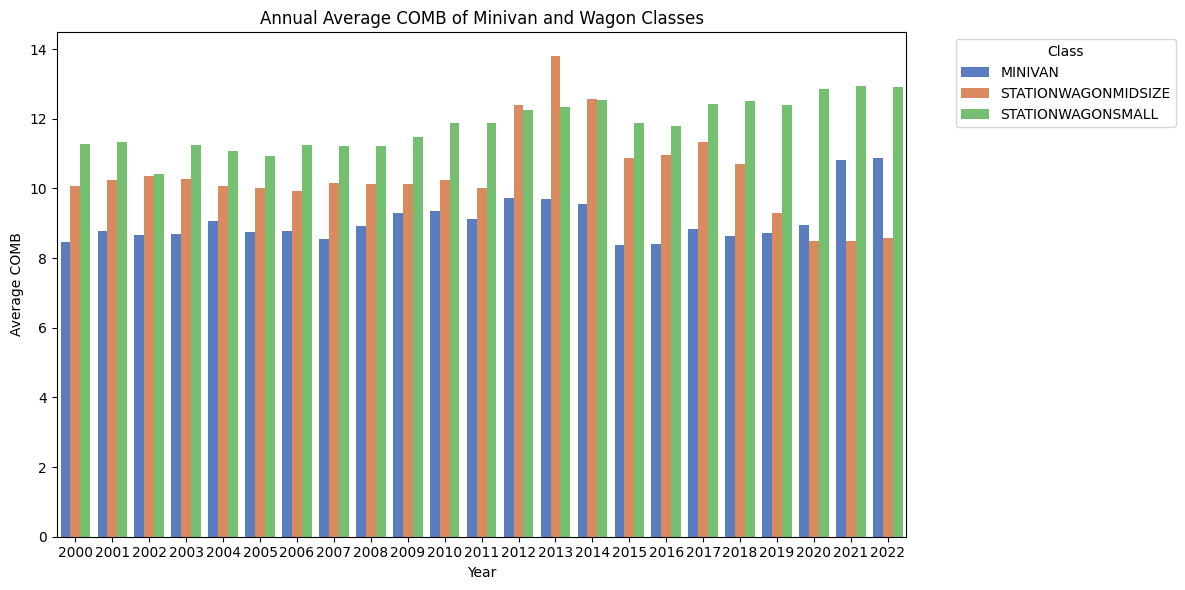

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_combined,
    x="YEAR",
    y="COMB (km/L)",
    hue="CLASS",         # MINIVAN + 각 WAGON 종류 색상 구분
    palette="muted"
)

plt.title("Annual Average COMB of Minivan and Wagon Classes")
plt.ylabel("Average COMB")
plt.xlabel("Year")
plt.legend(title="Class", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

#### 미드사이즈보다는 스몰사이즈가 친환경적이고 효율적인 차다
#### 미드사이즈 < 미니밴 < 스몰사이즈
#### 순서로 효율적이다

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'STATIONWAGONSMALL']['GEAR'].value_counts()

GEAR
6.0    297
5.0    273
7.0    130
4.0    117
8.0     54
9.0      6
Name: count, dtype: int64

#### 스몰 왜건은 5~6 구간의 기어를 많이 사용한다
#### 스몰 왜건이 최적의 차량이 아닐까?

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'STATIONWAGONSMALL']['FUEL'].value_counts()

FUEL
Gasoline    516
Premium     346
Diesel       15
Name: count, dtype: int64

#### 연료또한 가솔린을 사용한다
#### 스몰왜건이 최고인 듯하다

#### 실린더 별 수

In [ ]:
print(mobility_df['CYLINDERS'].value_counts().sort_index())

CYLINDERS
2       16
3      159
4     8049
5      499
6     8021
8     5187
10     162
12     451
16      12
Name: count, dtype: int64


#### 실린더 별 연비

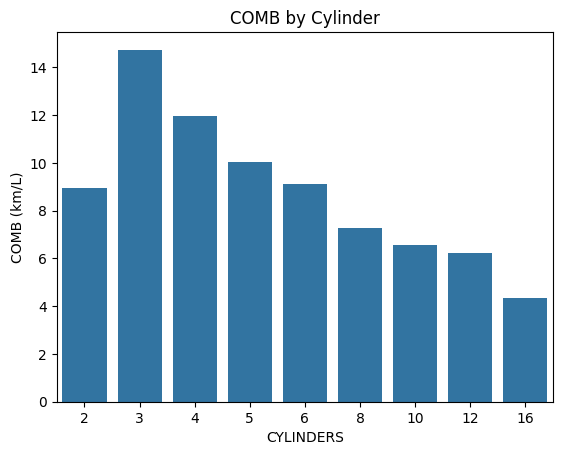

In [ ]:
cylinder_mean = mobility_df.groupby('CYLINDERS')[['COMB (km/L)', 'EMISSIONS']].mean().reset_index()
sns.barplot(data = cylinder_mean, x = 'CYLINDERS', y = 'COMB (km/L)')
plt.title('COMB by Cylinder')
plt.show()

#### 실린더 별 배출량

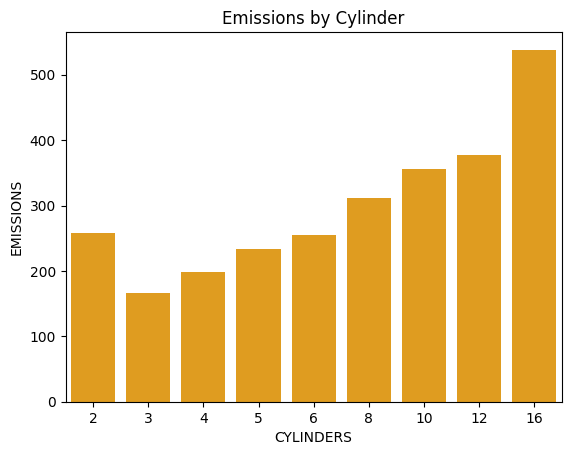

In [ ]:
sns.barplot(data = cylinder_mean, x = 'CYLINDERS', y = 'EMISSIONS', color = 'orange')
plt.title('Emissions by Cylinder')
plt.show()

#### 스몰왜건 실린더 별 수

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'STATIONWAGONSMALL']['CYLINDERS'].value_counts()

CYLINDERS
4    674
6    121
5     54
8     24
3      4
Name: count, dtype: int64

#### 기어 별 수

In [ ]:
print(mobility_df['GEAR'].value_counts().sort_index())

GEAR
1.0        8
3.0       24
4.0     3765
5.0     4395
6.0     7759
7.0     2670
8.0     2769
9.0      644
10.0     522
Name: count, dtype: int64


#### 기어별 연비

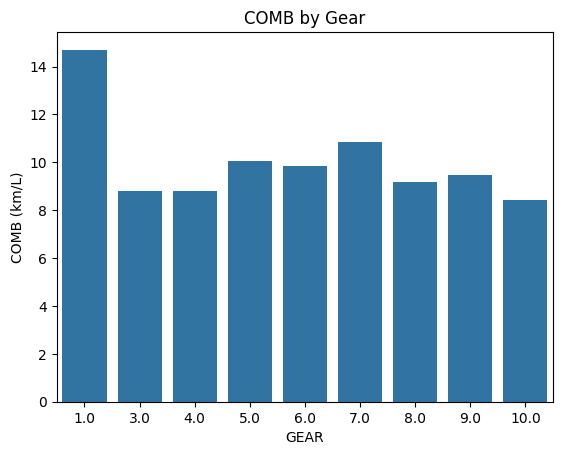

In [ ]:
gear_mean = mobility_df.groupby('GEAR')[['COMB (km/L)', 'EMISSIONS']].mean().reset_index()
sns.barplot(data = gear_mean, x = 'GEAR', y = 'COMB (km/L)')
plt.title('COMB by Gear')
plt.show()

#### 기어별 배출량

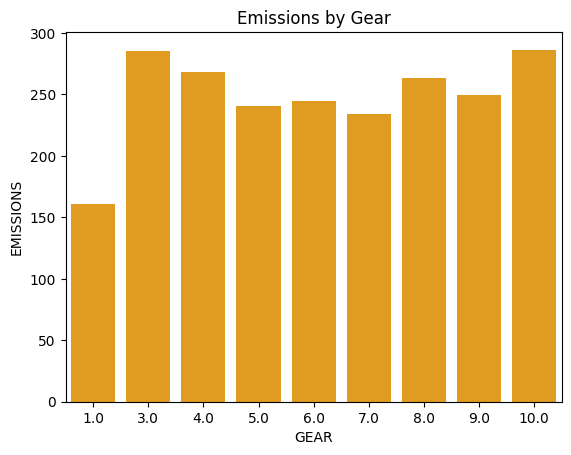

In [ ]:
sns.barplot(data = gear_mean, x = 'GEAR', y = 'EMISSIONS', color = 'orange')
plt.title('Emissions by Gear')
plt.show()

#### 스몰왜건 기어 별 수

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'STATIONWAGONSMALL']['GEAR'].value_counts()

GEAR
6.0    297
5.0    273
7.0    130
4.0    117
8.0     54
9.0      6
Name: count, dtype: int64

#### 변속기 별 수

In [ ]:
print(mobility_df['PREFIX'].value_counts().sort_index())

PREFIX
A     8691
AM    1078
AS    6736
AV    1207
M     4844
Name: count, dtype: int64


#### 변속기 별 연비

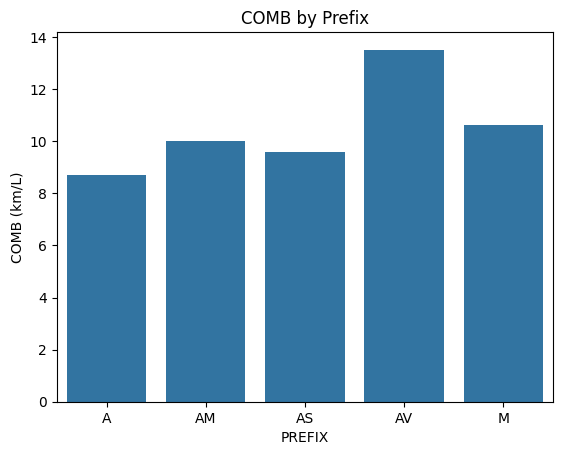

In [ ]:
prefix_mean = mobility_df.groupby('PREFIX')[['COMB (km/L)', 'EMISSIONS']].mean().reset_index()
sns.barplot(data = prefix_mean, x = 'PREFIX', y = 'COMB (km/L)')
plt.title('COMB by Prefix')
plt.show()

#### 변속기 별 배출량

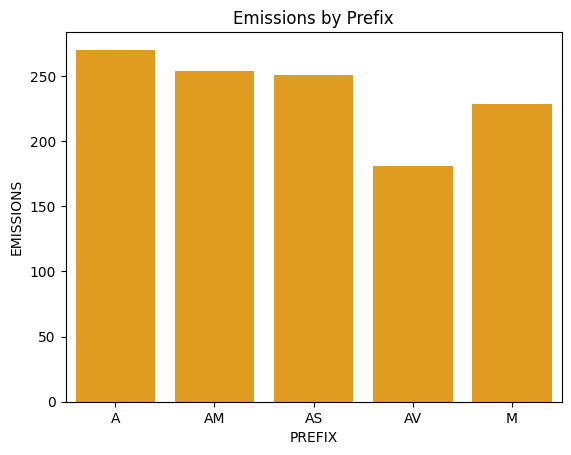

In [ ]:
sns.barplot(data = prefix_mean, x = 'PREFIX', y = 'EMISSIONS', color = 'orange')
plt.title('Emissions by Prefix')
plt.show()

#### 스몰왜건 변속기 수

In [ ]:
mobility_df[mobility_df['VEHICLE CLASS'] == 'STATIONWAGONSMALL']['PREFIX'].value_counts()

PREFIX
M     321
AS    217
A     171
AV    116
AM     52
Name: count, dtype: int64